**Step 1: Installing and importing Modules**

In [2]:
!pip install colorama
!pip install plotly_express
import collections
import string
import nltk
import pandas as pd
import colorama
import matplotlib.pyplot as plt
import plotly_express as px

You should consider upgrading via the 'c:\users\kaust\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\kaust\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [5]:
data = pd.read_csv('/content/drive/MyDrive/database.txt', sep = '\t', header=None, names=["label", "comment"])
data['length'] = data['comment'].apply(len)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/database.txt'

**Step 2: Pre-Processing**

In [62]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')
punctuation = string.punctuation

def pre_process(comments):
    remove_punct = "".join([word.lower() for word in comments if word not in punctuation])
    tokenize = nltk.tokenize.word_tokenize(remove_punct)
    remove_stopwords = [word for word in tokenize if word not in stopwords]
    return remove_stopwords

#adding a column to our data with our processed messages
data['processed'] = data['comment'].apply(lambda x: pre_process(x))

# print(data['processed'].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Step 3: Data Visualization**

**For NON**

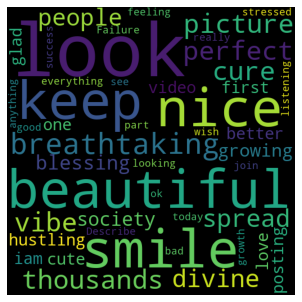

In [63]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
non_words=' '.join(list(data[data['label']=='non']['comment']))
non_wc= WordCloud(width=512,height=512).generate(non_words)
plt.imshow(non_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**For TOXIC**

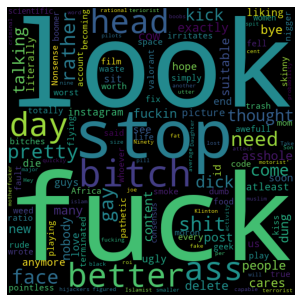

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
toxic_words=' '.join(list(data[data['label']=='toxic']['comment']))
toxic_wc= WordCloud(width=512,height=512).generate(toxic_words)
plt.imshow(toxic_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

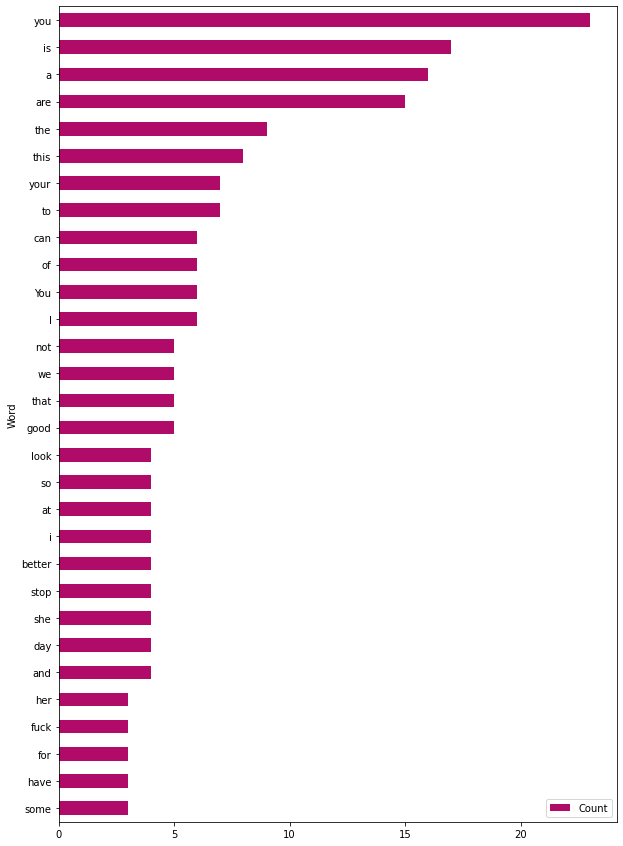

In [66]:
def word_count_plot(data):
     # finding words along with count
     word_counter = collections.Counter([word for sentence in data for word in sentence.split()])
     most_count = word_counter.most_common(30) # 30 most common words
     # sorted data frame
     most_count = pd.DataFrame(most_count, columns=["Word", "Count"]).sort_values(by="Count")
     most_count.plot.barh(x = "Word", y = "Count", color="#b00b69", figsize=(10, 15))
word_count_plot(data["comment"])

**Step 4: Categorizing and Counting Tokens**

In [67]:
def categorize_words():
    toxic_words = []
    non_words = []
    #handling messages associated with spam
    for comments in data['processed'][data['label'] == 'toxic']:
        for word in comments:
            toxic_words.append(word)
    #handling messages associated with ham
    for comments in data['processed'][data['label'] == 'non']:
        for word in comments:
            non_words.append(word)
    return toxic_words, non_words

toxic_words, non_words = categorize_words()

print("Toxic words: ",toxic_words[:5])
print("Non-Toxic words: ",non_words[:5])

Toxic words:  ['post', 'exactly', 'cow', 'dung', 'fuck']
Non-Toxic words:  ['look', 'beautiful', 'smile', 'breathtaking', 'picture']


**Step 5: Predicting Messages**

In [68]:
def predict(comments):
    toxic_counter = 0
    non_counter = 0
    #count the occurances of each word in the sms string
    for word in comments:
        toxic_counter += toxic_words.count(word)
        non_counter += non_words.count(word)
    print(' \u001b[1;34m***RESULTS***')
    #if the message is non
    if non_counter > toxic_counter:
        accuracy = round((non_counter / (non_counter + toxic_counter) * 100))
        print(f"\u001b[1;32m message is not toxic, with {accuracy}% certainty ")
    #if the message could be equally spam and ham
    elif non_counter == toxic_counter:
        print("\u001b[1;33m message could be toxic")
    #if the message is spam
    else:
        accuracy = round((toxic_counter / (non_counter + toxic_counter)* 100))
        print(f"\u001b[1;31m message is toxic, with {accuracy}% certainty")

**Step 6: Producing Outputs**

In [72]:
user_input = input("Please type a toxic or non-toxic comment to check if our function predicts accurately\n")
#pre-processing the input before prediction
processed_input = pre_process(user_input)

predict(processed_input)

Please type a toxic or non-toxic comment to check if our function predicts accurately
fucking nigger
 ***RESULTS***
 message is toxic, with 100% certainty
